# Project name ---> Handwritten Digit Recognition! 

In [4]:
# importing all nessry libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from PIL import Image 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , euclidean_distances , classification_report


### loading dataset from zip file direclty without csv file 

In [5]:
# loading datasets and one version that handles both cases (first run = extract, next run = skip)
import zipfile
import os

zip_path = r"C:\Users\Ravichandran\Downloads\archive (7).zip"   #  zip file path
extract_path ="dataset"
# folder to extract giving name to file  
# and i am using this "." becouse if i  run again this will always create a subfolder called dataset
# Note :-  if already extarcted if not dont use 
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extracted to:", extract_path)

else:
    print(f"Dataset already exists at: {extract_path}")



Dataset already exists at: dataset


### Successfuly extarcted dataset from zip files

### Load Images Automatically (No CSV Needed)
#### Converts raw image files into numerical arrays that machine learning algorithms can understand and process
##### 0 → black
##### 25, 20, 8 → very dark gray pixels
##### 128 → medium gray
##### 200 → light gray
##### 252, 253, 254, 255 → almost white pixels

In [6]:
from PIL import Image 
#PIL.Image → library to open and process images (resize, convert to grayscale,
#  and also A library for manipulating, and saving many different image file formats
X = [] # for futures 
y = [] # for target

# Loop over each class folder
for label in range(10):  # since digits are 0-9
    folder = os.path.join(extract_path, str(label))
    for file in os.listdir(folder):   # file (image)
        file_path = os.path.join(folder, file)
        try:
            img = Image.open(file_path).convert("L") 
            # grayscale makes one channel or removes color channels (RGB → 1 channel), makes processing easier.
            
            img = img.resize((28, 28))                # make uniform size
            img_array = np.array(img).flatten()       # flatten to 784 vector or # flatten to 1D vector  (Feature Engineering)
            # Converts image to numbers and  Result: [25, 20, 15, 12, 8, 0, 0, 255, 200, ...] 784 numbers total
            
            X.append(img_array) #  img_array.shape = (784,)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)
print(img_array) # one image pixels  28x28 = 784 pixels
print("Dataset shape:", X.shape, y.shape)

[252 252 253 253 254 254 254 254 254 255 255 255 255 255 255 255 255 255
 255 255 254 255 255 255 254 254 255 251 253 253 253 253 254 254 254 254
 254 255 255 255 255 255 255 255 255 255 255 255 254 254 255 255 255 254
 254 253 253 253 253 253 255 255 255 254 254 255 255 255 254 254 254 255
 255 255 255 255 254 254 254 254 254 255 255 254 253 253 253 253 255 255
 255 254 254 255 255 255 254 254 255 254 254 254 254 255 254 254 254 254
 254 255 255 254 252 252 253 253 255 255 255 254 254 255 254 254 254 255
 255 254 254 253 253 253 254 254 255 255 255 255 255 254 252 252 253 254
 254 254 254 253 252 250 253 255 250 243 243 249 250 251 250 253 254 254
 254 254 254 254 255 254 254 254 254 254 253 254 253 252 254 250 216 173
 146 136 160 176 135 179 244 251 254 254 254 254 254 254 254 254 253 253
 254 254 253 254 250 251 228 145 114 172 211 230 241 211 109 113 213 253
 254 254 254 254 254 253 253 253 253 253 254 254 253 253 252 237 118 136
 232 253 253 252 252 237 119 107 227 252 253 253 25

In [7]:
# checking how many folders are created (ignore extarnal datsets)
print(os.listdir("dataset")) # inside dataset/ 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'dataset']


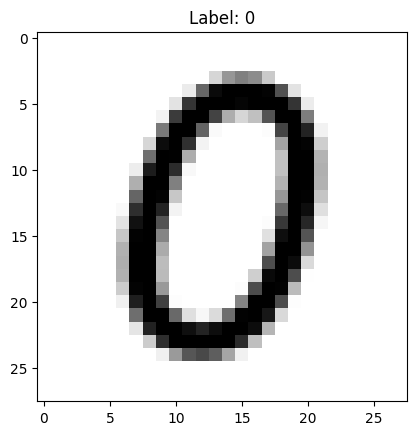

In [8]:
#  images are flattened (784,), need to reshape them back to 28x28 for visualization:
# Display Sample Images (one image)
import matplotlib.pyplot as plt

# Reshape first image from 784 → 28x28
sample_image = X[50].reshape(28, 28) # giving indexing X[index]

# Display
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {y[0]}')
plt.show()

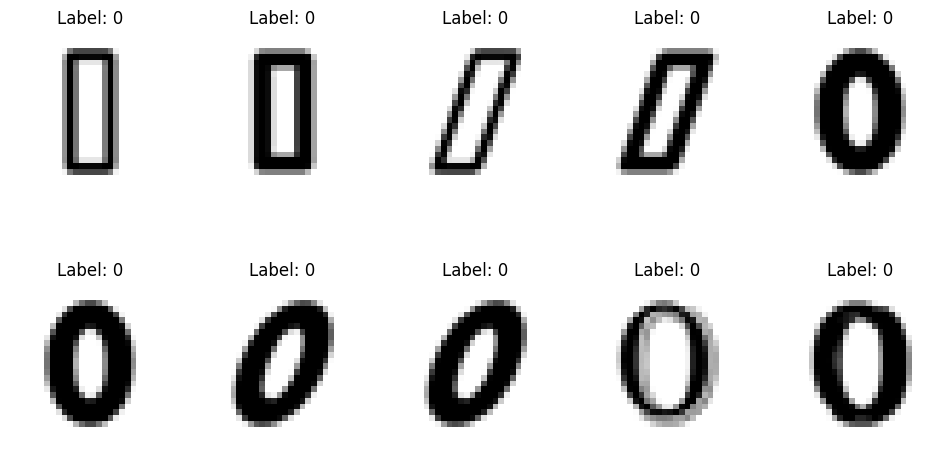

In [9]:
# Multiple images using subplots and (shows different shapes)
# Show first 10 images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i//5, i%5] #  ax is each individual plot box
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off') # Removes the axis lines, ticks, labels, and grid - everything except the actual image
plt.show()

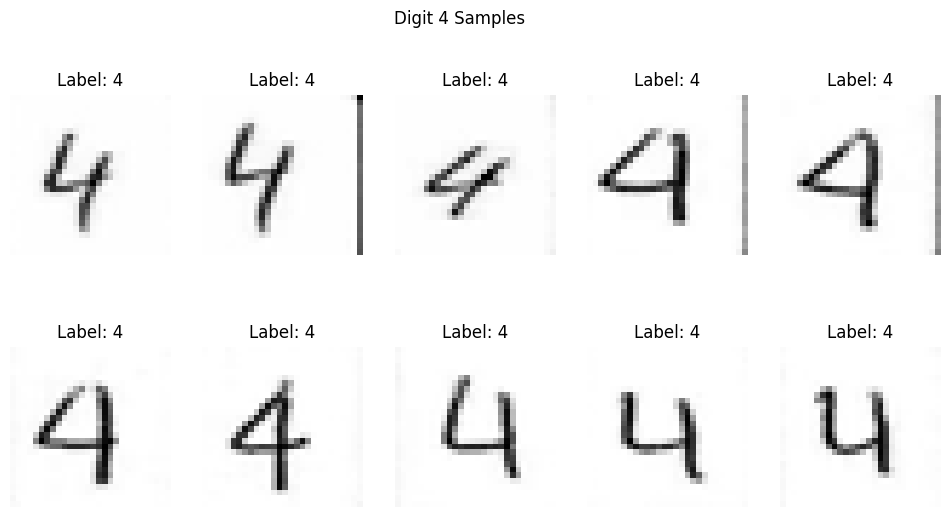

In [10]:
# To see digit "1 to 9" samples instead of "0":
digit_to_show = 4  # Change  number to (0-9) 

# Finding all indices where y equals to  chosen digit
digit_indices = np.where(y == digit_to_show)[0] # Takes FIRST position only ,  like 1st sample of digit 5 , 2nd sample of digit 5  

# Show first 10 samples of that digit
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    if i < len(digit_indices):
        idx = digit_indices[i]
        ax = axes[i//5, i%5]
        ax.imshow(X[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {y[idx]}')
        ax.axis('off')
plt.suptitle(f'Digit {digit_to_show} Samples')
plt.show()

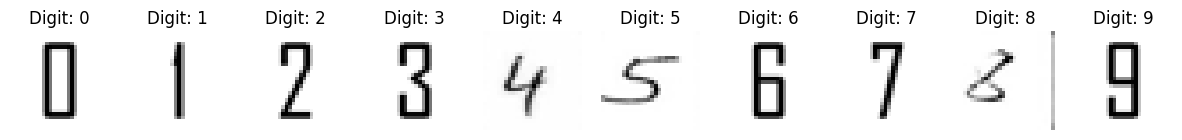

In [11]:
# Show one sample from each digit (0-9)
plt.figure(figsize=(15, 3))
for digit in range(10):
    digit_indices = np.where(y == digit)[0]
    sample_idx = digit_indices[0]  # First sample of each digit
    
    plt.subplot(1, 10, digit + 1)
    plt.imshow(X[sample_idx].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {digit}')
    plt.axis('off')
plt.show()

# Trainig A KNN model

In [12]:
# Scaling data 
X_scaled = X/255.0
# spliting dataset into training and testing data sets for training
X_train , X_test ,y_train , y_test = train_test_split(X_scaled, y , test_size=0.2 , random_state=42)
print("training dataset: %d rows\nTestdataset : %d row " %  (X_train.shape[0] , X_test.shape[0]))


training dataset: 25372 rows
Testdataset : 6343 row 


In [13]:
model = KNeighborsClassifier(n_neighbors=1 , metric='euclidean')
model.fit(X_train , y_train)
print(model)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)


In [14]:
# making prediction 
prediction = model.predict(X_test)
print(prediction)

[4 4 2 ... 3 1 3]


In [15]:
# Tuning by giving some hyperparameter
for k in [1,3,5,7,11]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(k, model.score(X_test, y_test))

1 0.8454989752483052
3 0.8207472804666561
5 0.8196437017184298
7 0.8084502601292763
11 0.8051395238845972


# visualizing output given by model

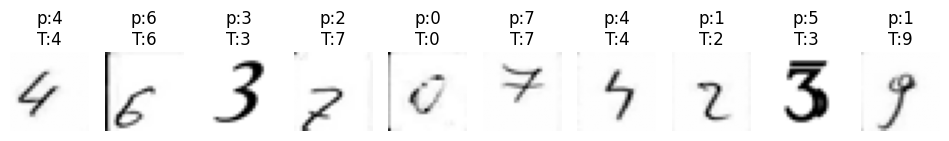

In [16]:
import random
indices = random.sample(range(len(X_test)) , 10)


plt.figure(figsize=(12,3))
for i , idx in enumerate(indices):
    img = X_test[idx].reshape(28,28)

    true_label = y_test[idx]
    pred_label = model.predict([X_test[idx]])[0]
    
    plt.subplot(1,10,i+1)
    plt.imshow(img , cmap='gray')
    plt.title(f"p:{pred_label}\nT:{true_label}")
    plt.axis("off") 
    
plt.show()   


In [17]:
# Accuracy

Knn = accuracy_score(y_test , prediction)
print(Knn)

0.8454989752483052


In [18]:
# Original pixel values 
print(f"Current pixel range: {X.min()} to {X.max()}")

Current pixel range: 0 to 255


In [19]:
# Scaled pixel values 
print(f"Current pixel range: {X_scaled.min()} to {X_scaled.max()}")

Current pixel range: 0.0 to 1.0


In [20]:
print("/n Classification Report :")
print(classification_report(y_test  ,  prediction))

/n Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       633
           1       0.79      0.97      0.87       668
           2       0.86      0.90      0.88       659
           3       0.84      0.78      0.81       651
           4       0.87      0.81      0.84       650
           5       0.85      0.81      0.83       614
           6       0.86      0.89      0.88       636
           7       0.86      0.88      0.87       602
           8       0.89      0.71      0.79       638
           9       0.86      0.76      0.81       592

    accuracy                           0.85      6343
   macro avg       0.85      0.84      0.84      6343
weighted avg       0.85      0.85      0.84      6343

